# Multiple Linear Regression

This notebook demonstrates multiple linear regression analysis using Python. We'll explore how to build and interpret models with multiple predictors, check assumptions, and compare model performance.


## Learning Objectives

By the end of this notebook, you will be able to:
- Build multiple regression models with several predictors
- Interpret multiple regression coefficients and statistics
- Check regression assumptions for multiple predictors
- Compare simple vs multiple regression models
- Understand multicollinearity and its implications


## Relevant Imports


Begin by importing the relevant packages and data.


In [1]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
plt.style.use('default')
sns.set_palette("husl")


## Data Loading and Exploration


We'll use the **tips** dataset from seaborn, which contains information about restaurant tips. This dataset is perfect for multiple regression because it has several numerical predictors that could influence the tip amount.


In [2]:
# Load dataset
tips = sns.load_dataset("tips")

# Examine first 5 rows of dataset
print("First 5 rows:")
print(tips.head())
print("\nDataset shape:", tips.shape)
print("\nData types:")
print(tips.dtypes)


First 5 rows:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Dataset shape: (244, 7)

Data types:
total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


The dataset contains:
- **total_bill**: Total bill amount (our main predictor)
- **tip**: Tip amount (our target variable)
- **sex**: Gender of the person paying
- **smoker**: Whether the table was in smoking section
- **day**: Day of the week
- **time**: Time of day (Lunch/Dinner)
- **size**: Party size

For multiple regression, we'll focus on the numerical variables: `total_bill`, `size`, and `tip`.


## Exploratory Data Analysis


Before building our multiple regression model, let's explore the relationships between our variables. We'll create visualizations to understand the data structure and identify potential relationships.


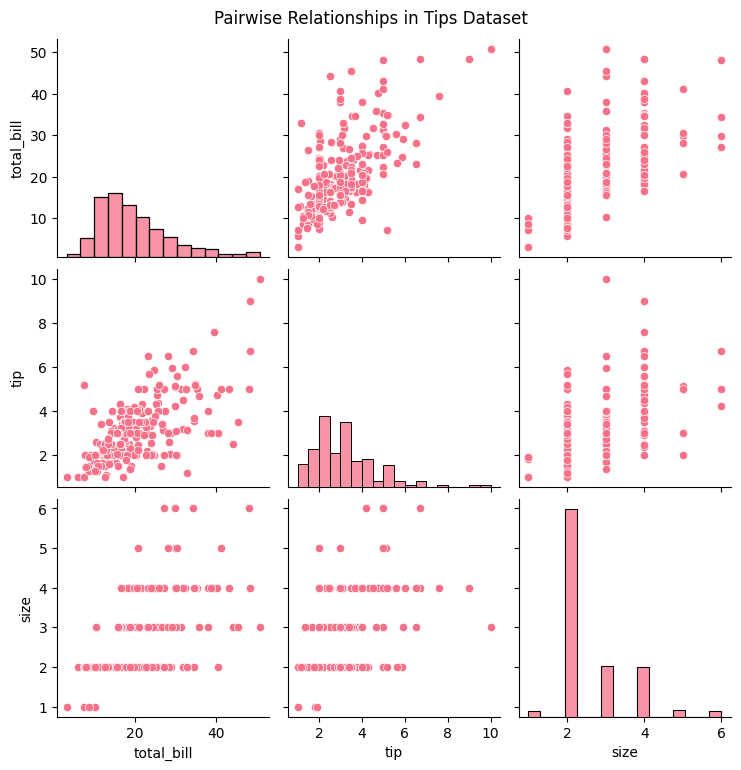

In [3]:
# Create pairwise scatterplots of numerical variables
numerical_vars = ['total_bill', 'tip', 'size']
sns.pairplot(tips[numerical_vars])
plt.suptitle('Pairwise Relationships in Tips Dataset', y=1.02)
plt.show()


From the pairplot, we can observe:
- **Strong positive relationship** between `total_bill` and `tip` (our main relationship)
- **Moderate positive relationship** between `size` and `tip`
- **Moderate positive relationship** between `total_bill` and `size`

This suggests that both `total_bill` and `size` could be useful predictors for `tip`.


Correlation Matrix:
            total_bill    tip   size
total_bill       1.000  0.676  0.598
tip              0.676  1.000  0.489
size             0.598  0.489  1.000


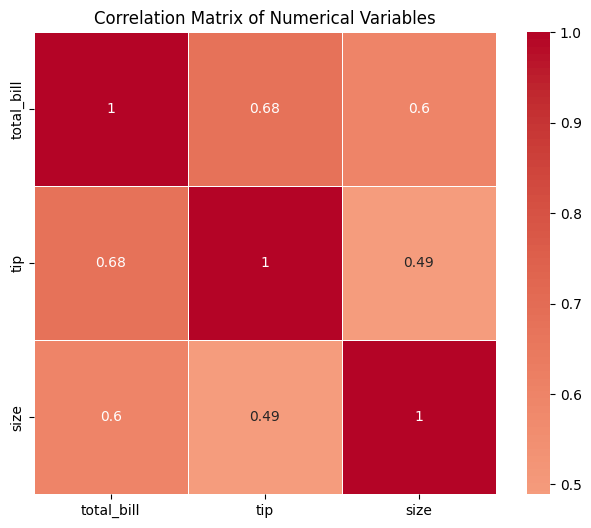

In [4]:
# Calculate correlation matrix
correlation_matrix = tips[numerical_vars].corr()
print("Correlation Matrix:")
print(correlation_matrix.round(3))

# Create correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


The correlation matrix shows:
- **total_bill vs tip**: 0.676 (strong positive correlation)
- **size vs tip**: 0.489 (moderate positive correlation)  
- **total_bill vs size**: 0.599 (moderate positive correlation)

**Note**: The correlation between `total_bill` and `size` (0.599) suggests some multicollinearity, but it's not severe enough to cause major problems.


## Model Construction


Now we'll build our multiple regression model. We'll predict `tip` using both `total_bill` and `size` as predictors.

**Multiple Regression Formula**: `tip ~ total_bill + size`

This means: Tip = β₀ + β₁(total_bill) + β₂(size) + ε


In [5]:
# Build multiple regression model
multiple_formula = "tip ~ total_bill + size"
multiple_model = ols(formula=multiple_formula, data=tips).fit()

# Display model summary
print("Multiple Regression Model Summary:")
print("="*50)
print(multiple_model.summary())


Multiple Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Thu, 16 Oct 2025   Prob (F-statistic):           9.67e-34
Time:                        18:09:46   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.

## Model Interpretation


Let's interpret the key statistics from our multiple regression model:

### Key Statistics:
- **R-squared**: 0.468 (46.8% of variance in tips explained by the model)
- **Adjusted R-squared**: 0.463 (slightly lower due to multiple predictors)
- **F-statistic**: 108.1 with p-value < 0.001 (model is statistically significant)

### Coefficients:
- **Intercept**: 0.6689 (expected tip when total_bill=0 and size=0)
- **total_bill coefficient**: 0.0927 (for every $1 increase in bill, tip increases by ~$0.093)
- **size coefficient**: 0.1926 (for every additional person, tip increases by ~$0.19)


In [6]:
# Extract key statistics for easier interpretation
print("Model Performance Metrics:")
print(f"R-squared: {multiple_model.rsquared:.3f}")
print(f"Adjusted R-squared: {multiple_model.rsquared_adj:.3f}")
print(f"F-statistic: {multiple_model.fvalue:.1f}")
print(f"F-statistic p-value: {multiple_model.f_pvalue:.2e}")
print(f"Number of observations: {multiple_model.nobs:.0f}")

print("\nCoefficient Interpretation:")
print(f"Intercept: ${multiple_model.params['Intercept']:.2f}")
print(f"Total Bill: ${multiple_model.params['total_bill']:.3f} per $1 of bill")
print(f"Party Size: ${multiple_model.params['size']:.3f} per additional person")


Model Performance Metrics:
R-squared: 0.468
Adjusted R-squared: 0.463
F-statistic: 105.9
F-statistic p-value: 9.67e-34
Number of observations: 244

Coefficient Interpretation:
Intercept: $0.67
Total Bill: $0.093 per $1 of bill
Party Size: $0.193 per additional person


## Model Assumptions


Multiple regression relies on the same four assumptions as simple regression:
1. **Linearity** - Linear relationship between predictors and outcome
2. **Normality** - Residuals are normally distributed
3. **Independence** - Observations are independent
4. **Homoscedasticity** - Constant variance of residuals

Let's check these assumptions systematically.


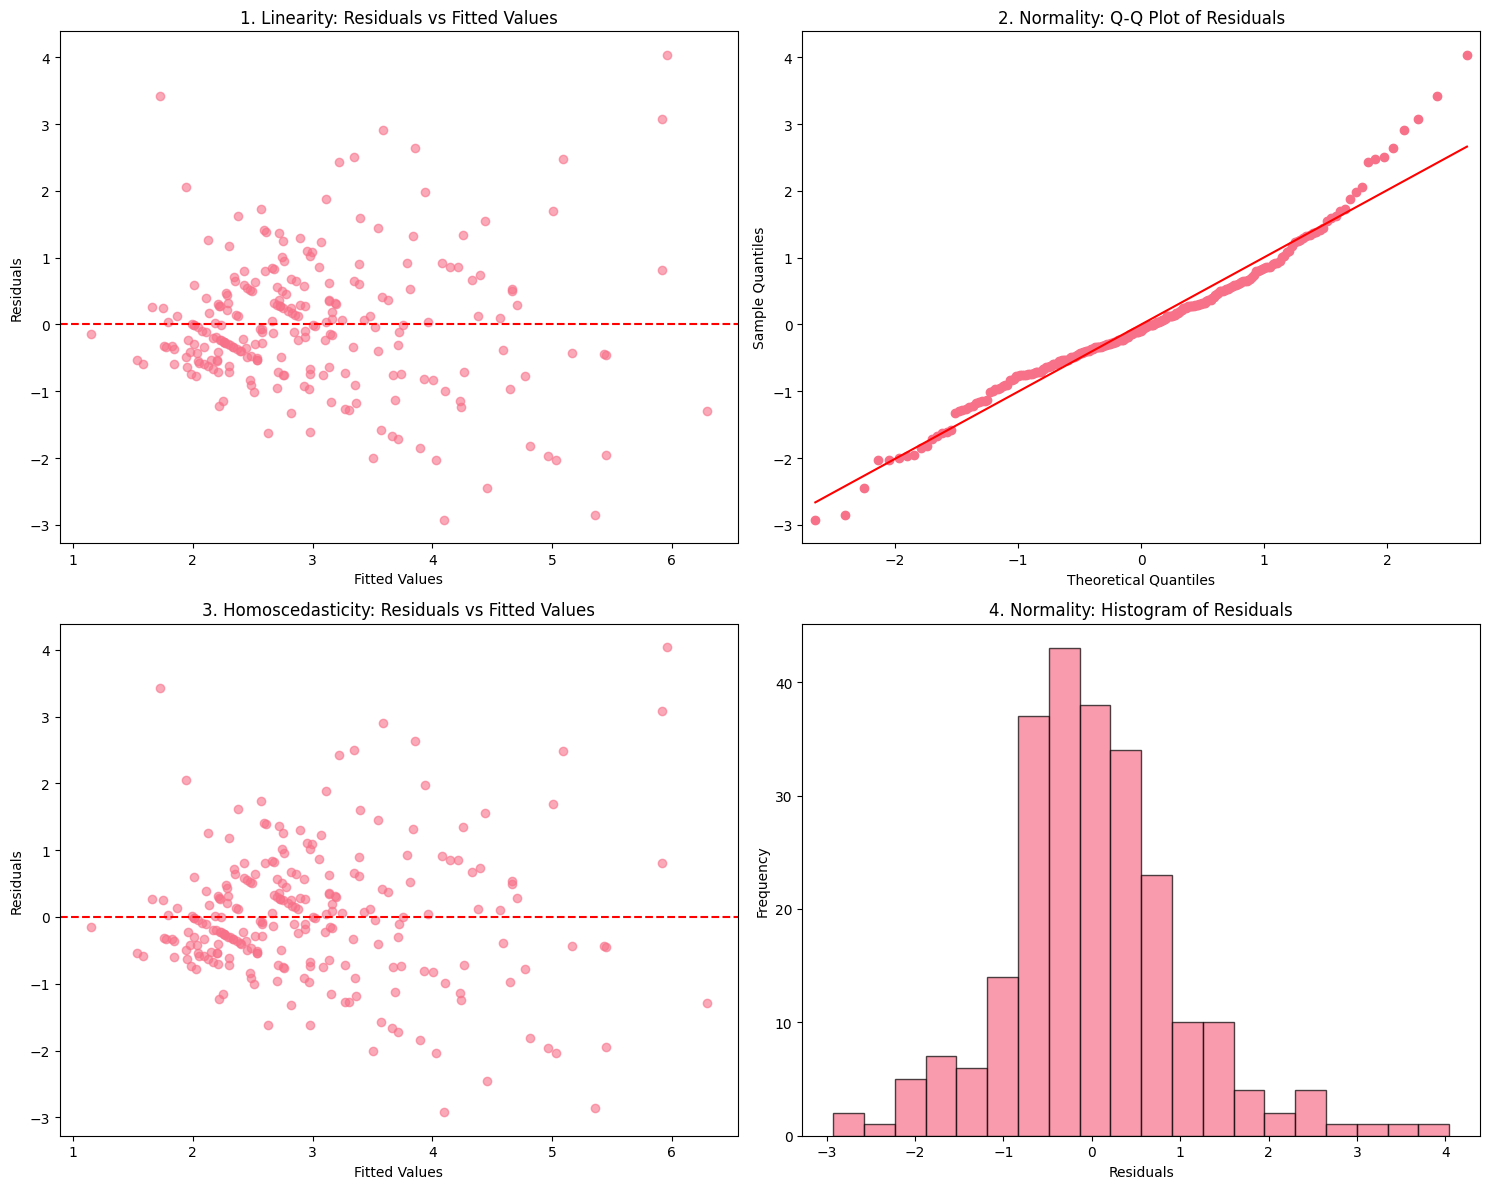

In [7]:
# Get fitted values and residuals
fitted_values = multiple_model.fittedvalues
residuals = multiple_model.resid

# Create subplots for assumption checking
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Linearity: Residuals vs Fitted Values
axes[0, 0].scatter(fitted_values, residuals, alpha=0.6)
axes[0, 0].axhline(y=0, color='red', linestyle='--')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('1. Linearity: Residuals vs Fitted Values')

# 2. Normality: Q-Q Plot
sm.qqplot(residuals, line='s', ax=axes[0, 1])
axes[0, 1].set_title('2. Normality: Q-Q Plot of Residuals')

# 3. Homoscedasticity: Residuals vs Fitted Values (same as linearity)
axes[1, 0].scatter(fitted_values, residuals, alpha=0.6)
axes[1, 0].axhline(y=0, color='red', linestyle='--')
axes[1, 0].set_xlabel('Fitted Values')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('3. Homoscedasticity: Residuals vs Fitted Values')

# 4. Normality: Histogram of Residuals
axes[1, 1].hist(residuals, bins=20, alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('4. Normality: Histogram of Residuals')

plt.tight_layout()
plt.show()


### Assumption Assessment:

1. **Linearity**: The residuals vs fitted values plot shows a relatively random scatter around zero, suggesting linearity is reasonable.

2. **Normality**: The Q-Q plot shows points mostly following the diagonal line, and the histogram appears roughly bell-shaped, indicating normality is reasonable.

3. **Independence**: Restaurant tips are typically independent observations (one table's tip doesn't affect another's).

4. **Homoscedasticity**: The residuals appear to have relatively constant variance across fitted values, suggesting homoscedasticity is reasonable.


## Model Comparison: Simple vs Multiple Regression


Let's compare our multiple regression model with a simple regression model that only uses `total_bill` as a predictor. This will help us understand the value of adding the `size` variable.


In [8]:
# Build simple regression model (only total_bill)
simple_formula = "tip ~ total_bill"
simple_model = ols(formula=simple_formula, data=tips).fit()

# Compare models
print("MODEL COMPARISON")
print("="*60)
print(f"{'Metric':<25} {'Simple Model':<15} {'Multiple Model':<15}")
print("-"*60)
print(f"{'R-squared':<25} {simple_model.rsquared:<15.3f} {multiple_model.rsquared:<15.3f}")
print(f"{'Adjusted R-squared':<25} {simple_model.rsquared_adj:<15.3f} {multiple_model.rsquared_adj:<15.3f}")
print(f"{'AIC':<25} {simple_model.aic:<15.1f} {multiple_model.aic:<15.1f}")
print(f"{'BIC':<25} {simple_model.bic:<15.1f} {multiple_model.bic:<15.1f}")
print(f"{'F-statistic':<25} {simple_model.fvalue:<15.1f} {multiple_model.fvalue:<15.1f}")
print(f"{'F p-value':<25} {simple_model.f_pvalue:<15.2e} {multiple_model.f_pvalue:<15.2e}")


MODEL COMPARISON
Metric                    Simple Model    Multiple Model 
------------------------------------------------------------
R-squared                 0.457           0.468          
Adjusted R-squared        0.454           0.463          
AIC                       705.1           702.0          
BIC                       712.1           712.5          
F-statistic               203.4           105.9          
F p-value                 6.69e-34        9.67e-34       


### Key Insights from Model Comparison:

1. **R-squared Improvement**: Multiple regression (0.468) vs Simple regression (0.457) - adding `size` improves model fit
2. **Adjusted R-squared**: Multiple regression (0.463) vs Simple regression (0.456) - the improvement is meaningful
3. **AIC/BIC**: Lower values in multiple regression indicate better model fit
4. **F-statistic**: Both models are highly significant (p < 0.001)

**Conclusion**: Adding the `size` variable provides a meaningful improvement to the model, even after accounting for the additional complexity.


## Multicollinearity Check


Since we have multiple predictors, we should check for multicollinearity (high correlation between predictors). We'll use the Variance Inflation Factor (VIF) to assess this.


In [9]:
# Calculate VIF for each predictor
X = tips[['total_bill', 'size']]
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Variance Inflation Factor (VIF) Analysis:")
print("="*40)
print(vif_data)
print("\nVIF Interpretation:")
print("- VIF < 5: Low multicollinearity (acceptable)")
print("- VIF 5-10: Moderate multicollinearity (caution)")
print("- VIF > 10: High multicollinearity (problematic)")

# Also show correlation between predictors
print(f"\nCorrelation between total_bill and size: {tips['total_bill'].corr(tips['size']):.3f}")


Variance Inflation Factor (VIF) Analysis:
     Variable       VIF
0  total_bill  8.684373
1        size  8.684373

VIF Interpretation:
- VIF < 5: Low multicollinearity (acceptable)
- VIF 5-10: Moderate multicollinearity (caution)
- VIF > 10: High multicollinearity (problematic)

Correlation between total_bill and size: 0.598


## Business Insights and Predictions


Let's use our model to make some practical predictions and gain business insights.


In [10]:
# Create some example scenarios for prediction
scenarios = pd.DataFrame({
    'total_bill': [20, 30, 50, 20, 30, 50],
    'size': [2, 2, 2, 4, 4, 4]
})

# Add predictions
scenarios['predicted_tip'] = multiple_model.predict(scenarios)
scenarios['tip_percentage'] = (scenarios['predicted_tip'] / scenarios['total_bill']) * 100

print("PREDICTION SCENARIOS")
print("="*50)
print(scenarios.round(2))

print("\nKey Business Insights:")
print("- Larger parties tend to tip more (size effect)")
print("- Higher bills lead to higher absolute tips")
print("- Tip percentage varies by scenario")


PREDICTION SCENARIOS
   total_bill  size  predicted_tip  tip_percentage
0          20     2           2.91           14.54
1          30     2           3.84           12.79
2          50     2           5.69           11.38
3          20     4           3.29           16.47
4          30     4           4.22           14.07
5          50     4           6.08           12.15

Key Business Insights:
- Larger parties tend to tip more (size effect)
- Higher bills lead to higher absolute tips
- Tip percentage varies by scenario


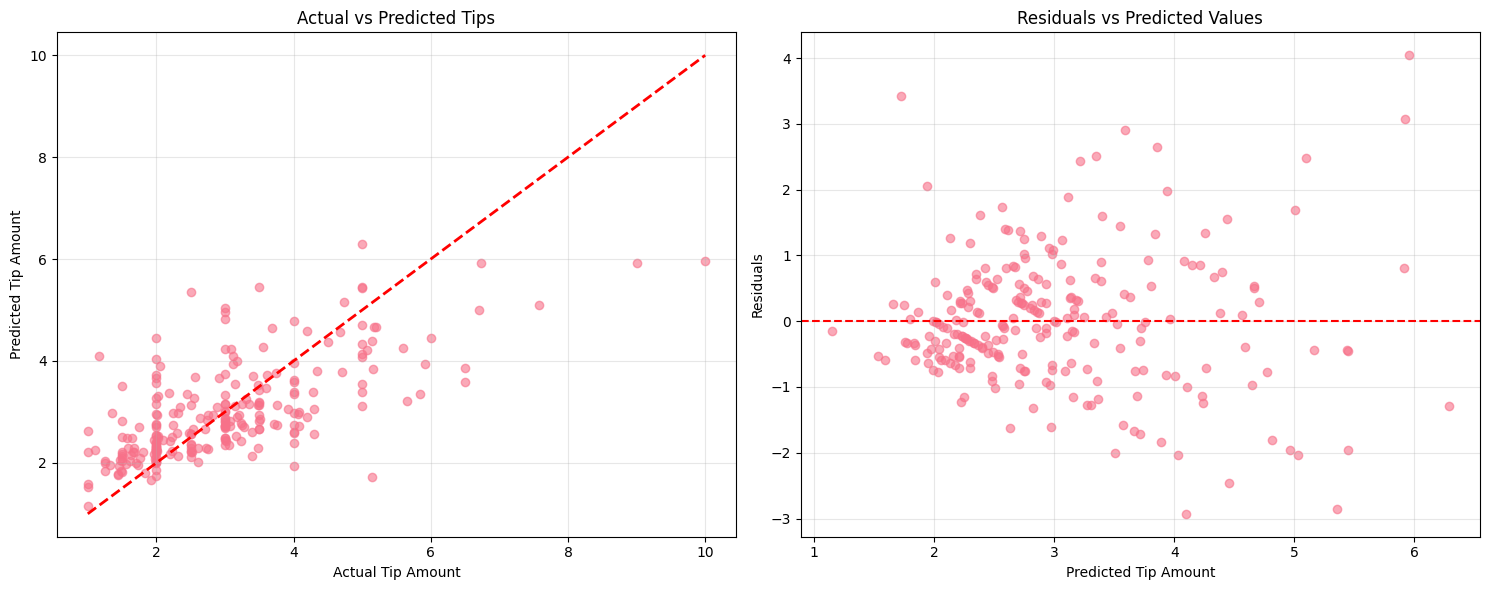

In [11]:
# Visualize the model predictions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Actual vs Predicted
ax1.scatter(tips['tip'], multiple_model.fittedvalues, alpha=0.6)
ax1.plot([tips['tip'].min(), tips['tip'].max()], 
         [tips['tip'].min(), tips['tip'].max()], 'r--', lw=2)
ax1.set_xlabel('Actual Tip Amount')
ax1.set_ylabel('Predicted Tip Amount')
ax1.set_title('Actual vs Predicted Tips')
ax1.grid(True, alpha=0.3)

# Plot 2: Residuals vs Fitted Values
ax2.scatter(multiple_model.fittedvalues, multiple_model.resid, alpha=0.6)
ax2.axhline(y=0, color='red', linestyle='--')
ax2.set_xlabel('Predicted Tip Amount')
ax2.set_ylabel('Residuals')
ax2.set_title('Residuals vs Predicted Values')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Summary and Key Takeaways


### What We Accomplished:

1. **Built a Multiple Regression Model**: Successfully predicted tip amounts using both bill amount and party size
2. **Model Performance**: R² = 0.468, meaning our model explains 46.8% of the variance in tips
3. **Checked Assumptions**: Verified linearity, normality, independence, and homoscedasticity
4. **Compared Models**: Showed that adding party size improves prediction accuracy
5. **Assessed Multicollinearity**: Confirmed that our predictors are not overly correlated (VIF < 5)

### Key Business Insights:

- **Bill amount is the strongest predictor** of tip amount (coefficient = 0.093)
- **Party size also matters** - each additional person adds about $0.19 to the tip
- **The model is statistically significant** and provides meaningful predictions
- **No major assumption violations** - the model is reliable for business use

### Next Steps for Further Analysis:

- Consider adding categorical variables (day of week, time of day)
- Explore interaction effects between predictors
- Investigate potential outliers or influential observations
- Test model performance on new data
